In [1]:
import folium

In [2]:
m = folium.Map(location=(4, -72))
m

In [3]:
map2 = folium.Map(location=[4.76, -74.1], tiles="cartodb positron", zoom_start=15)
map2

In [4]:
map = folium.Map(location=[3.74590, -71.78598], zoom_start=11)
tile = folium.TileLayer(
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      ).add_to(map)
map

In [5]:
m = folium.Map(location=(4, -72))
folium.Marker(
    location=[4, -72],
    tooltip="Titulo",
    popup="Texto",
    icon=folium.Icon(icon="cloud"),
).add_to(m)
m

In [6]:
m = folium.Map(location=[4, -72], zoom_start=8)
trail_coordinates = [
    (4.71, -72.15),
    (2.22, -71.16),
    (4.73, -73.18),
]
folium.PolyLine(trail_coordinates).add_to(m)
m

In [7]:
import gdown
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
# URL del archivo en Google Drive
url = 'https://drive.google.com/uc?id=1fJ7vWfH91UOue1u1F1LR5OU6GpO84g2j'
output = 'Inventario_de_movimientos_en_masa.csv'
gdown.download(url, output, quiet=False)
data = gpd.read_file(output)
data

Downloading...
From: https://drive.google.com/uc?id=1fJ7vWfH91UOue1u1F1LR5OU6GpO84g2j
To: /content/Inventario_de_movimientos_en_masa.csv
100%|██████████| 849k/849k [00:00<00:00, 32.8MB/s]


,X,Y,FID,OBJECTID,ID,INV_MOVIMI,F35DOV_TIP,TIPO,SUBTIPO_MO,SUBTIPO,CLAS_MAPA,ETIQUETA_M,ESRI_OID,geometry
0,-8430070.4274,258331.820599999,1,-7.58397098089e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,None
1,-8442006.3505,251832.989500001,2,-7.58397098089e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,None
2,-8442964.935,256351.1963,3,-7.58397098089e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,None
3,-8442624.7922,255639.4155,4,-7.58397098089e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,None
4,-8442501.1039,255391.840399999,5,-7.58397098089e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,-8087309.057,893729.7971,6822,-7.58397098089e+56,9752,33421,67,Caida,15,Caida de roca,Caida,cr,4706,None
6822,-8085279.0224,894243.1578,6823,-7.58397098089e+56,9753,33422,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4707,None
6823,-8105146.1501,882553.441599999,6824,-7.58397098089e+56,9754,33423,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,4708,None
6824,-8086501.9907,882667.7018,6825,-7.58397098089e+56,9755,33424,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4709,None


In [8]:
geometry = [Point(xy) for xy in zip(data['X'],data['Y'])]
data = gpd.GeoDataFrame(data,geometry =geometry)
data

,X,Y,FID,OBJECTID,ID,INV_MOVIMI,F35DOV_TIP,TIPO,SUBTIPO_MO,SUBTIPO,CLAS_MAPA,ETIQUETA_M,ESRI_OID,geometry
0,-8430070.4274,258331.820599999,1,-7.58397098089e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,POINT (-8430070.427 258331.821)
1,-8442006.3505,251832.989500001,2,-7.58397098089e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,POINT (-8442006.351 251832.990)
2,-8442964.935,256351.1963,3,-7.58397098089e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,POINT (-8442964.935 256351.196)
3,-8442624.7922,255639.4155,4,-7.58397098089e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,POINT (-8442624.792 255639.416)
4,-8442501.1039,255391.840399999,5,-7.58397098089e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,POINT (-8442501.104 255391.840)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,-8087309.057,893729.7971,6822,-7.58397098089e+56,9752,33421,67,Caida,15,Caida de roca,Caida,cr,4706,POINT (-8087309.057 893729.797)
6822,-8085279.0224,894243.1578,6823,-7.58397098089e+56,9753,33422,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4707,POINT (-8085279.022 894243.158)
6823,-8105146.1501,882553.441599999,6824,-7.58397098089e+56,9754,33423,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,4708,POINT (-8105146.150 882553.442)
6824,-8086501.9907,882667.7018,6825,-7.58397098089e+56,9755,33424,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4709,POINT (-8086501.991 882667.702)


In [9]:
data.crs = 'EPSG:3857'
data = data.to_crs("EPSG:4326")

In [10]:
data

,X,Y,FID,OBJECTID,ID,INV_MOVIMI,F35DOV_TIP,TIPO,SUBTIPO_MO,SUBTIPO,CLAS_MAPA,ETIQUETA_M,ESRI_OID,geometry
0,-8430070.4274,258331.820599999,1,-7.58397098089e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,POINT (-75.72861 2.32000)
1,-8442006.3505,251832.989500001,2,-7.58397098089e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,POINT (-75.83583 2.26167)
2,-8442964.935,256351.1963,3,-7.58397098089e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,POINT (-75.84444 2.30222)
3,-8442624.7922,255639.4155,4,-7.58397098089e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,POINT (-75.84139 2.29583)
4,-8442501.1039,255391.840399999,5,-7.58397098089e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,POINT (-75.84028 2.29361)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,-8087309.057,893729.7971,6822,-7.58397098089e+56,9752,33421,67,Caida,15,Caida de roca,Caida,cr,4706,POINT (-72.64953 8.00237)
6822,-8085279.0224,894243.1578,6823,-7.58397098089e+56,9753,33422,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4707,POINT (-72.63130 8.00693)
6823,-8105146.1501,882553.441599999,6824,-7.58397098089e+56,9754,33423,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,4708,POINT (-72.80977 7.90293)
6824,-8086501.9907,882667.7018,6825,-7.58397098089e+56,9755,33424,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4709,POINT (-72.64228 7.90395)


In [11]:
data["TIPO"].unique()

array(['Deslizamiento', 'Caida', 'Reptación', 'Volcamiento', 'Flujo',
       'Deformaciones gravitacionales', 'Propagación lateral'],
      dtype=object)

In [12]:
deslizamientos = data.query("TIPO == 'Deslizamiento'")
caida = data.query("TIPO == 'Caida'")
flujo = data.query("TIPO == 'Flujo'")

<Axes: >

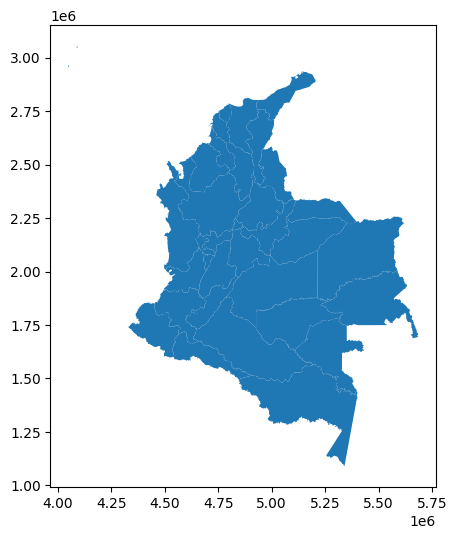

In [13]:
departamentos = gpd.read_file("/content/drive/MyDrive/2024-1/T&L/15. Semana/Divorcio/Departamentos.zip")
departamentos.plot(figsize=(6,6))

In [14]:
departamentos_mundial = departamentos.to_crs("EPSG:4326")
departamentos_mundial.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Flujo')

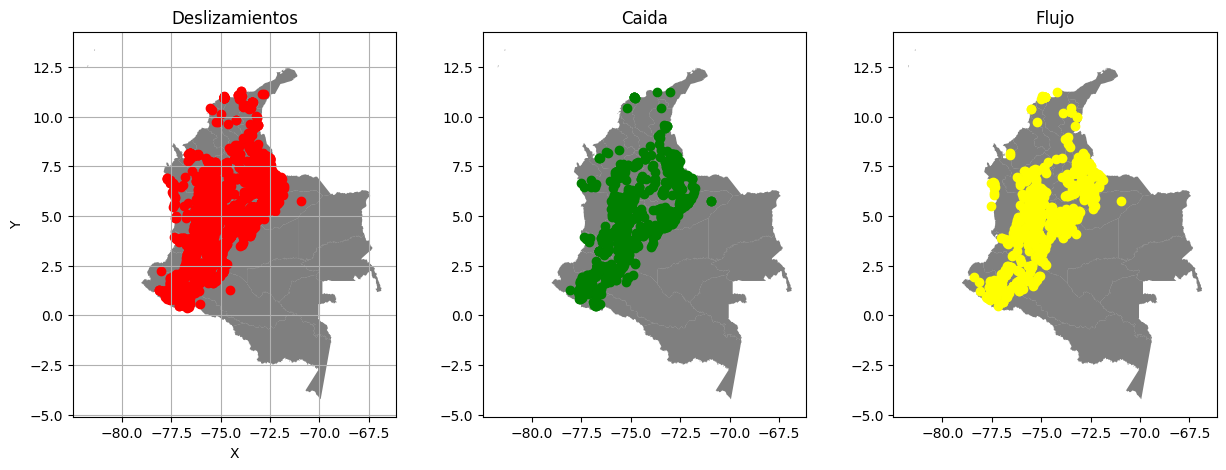

In [15]:
import matplotlib.pyplot as plt
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
#parte izquierda
departamentos_mundial.plot(ax = ax1,alpha=0.5, color = "black")
deslizamientos.plot(ax = ax1, color = "red")
ax1.set_title("Deslizamientos")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.grid()

#parte Central
departamentos_mundial.plot(ax = ax2,alpha=0.5, color = "black")
caida.plot(ax = ax2, color = "green")
ax2.set_title("Caida")

#parte Derecha
departamentos_mundial.plot(ax = ax3,alpha=0.5, color = "black")
flujo.plot(ax = ax3, color = "yellow")
ax3.set_title("Flujo")

In [16]:
coordinates = [(point.y, point.x) for point in flujo['geometry']]
m = folium.Map([4,-72], zoom_start=6)
HeatMap(coordinates).add_to(m)
m